In [0]:
from pandas_datareader import DataReader
from pandas import datetime
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
#import talib 


In [3]:
from google.colab import files
uploaded = files.upload()

Saving AMD.csv to AMD.csv
Saving LNG.csv to LNG.csv


In [0]:
amd_df=pd.read_csv('LNG.csv',parse_dates=['Date'])
lng_df=pd.read_csv('AMD.csv',parse_dates=['Date'])

In [0]:
amd=pd.DataFrame(amd_df)

In [0]:
 amd['Datetime'] = pd.to_datetime(amd['Date'])
 amd= amd.set_index(['Datetime'])


# amd_df.resample('1M').last().pct_change()

In [0]:
 o=amd.resample('BMS').first()#last()
#r_d = amd.pct_change()

In [8]:
o,amd

(                 Date  Adj_Close  Adj_Volume
 Datetime                                    
 1994-04-01 1994-04-04      72.00         0.0
 1994-05-02 1994-05-02      54.00         0.0
 1994-06-01 1994-06-01      36.00       200.0
 1994-07-01 1994-07-01      36.00         0.0
 1994-08-01 1994-08-01      36.00         0.0
 ...               ...        ...         ...
 2017-12-01 2017-12-01      48.48   1780673.0
 2018-01-01 2018-01-02      54.70   3022066.0
 2018-02-01 2018-02-01      57.86   1793786.0
 2018-03-01 2018-03-01      51.88   3313040.0
 2018-04-02 2018-04-02      52.99   2298339.0
 
 [289 rows x 3 columns],                  Date  Adj_Close  Adj_Volume
 Datetime                                    
 1994-04-04 1994-04-04      72.00         0.0
 1994-04-05 1994-04-05     108.00         0.0
 1994-04-06 1994-04-06     108.00         0.0
 1994-04-07 1994-04-07     108.00         0.0
 1994-04-08 1994-04-08     108.00         0.0
 ...               ...        ...         ...
 2018-04

In [9]:
#r_d=amd_df.pct_change()
o_copy=o
o_copy

,Date,Adj_Close,Adj_Volume
Datetime,,,
1994-04-01,1994-04-04,72.00,0.0
1994-05-02,1994-05-02,54.00,0.0
1994-06-01,1994-06-01,36.00,200.0
1994-07-01,1994-07-01,36.00,0.0
1994-08-01,1994-08-01,36.00,0.0
...,...,...,...
2017-12-01,2017-12-01,48.48,1780673.0
2018-01-01,2018-01-02,54.70,3022066.0
2018-02-01,2018-02-01,57.86,1793786.0


In [10]:
  #=pd.concat([o3_copy,o_copy],axis=1)
del o_copy['Date']
o_copy

,Adj_Close,Adj_Volume
Datetime,,
1994-04-01,72.00,0.0
1994-05-02,54.00,0.0
1994-06-01,36.00,200.0
1994-07-01,36.00,0.0
1994-08-01,36.00,0.0
...,...,...
2017-12-01,48.48,1780673.0
2018-01-01,54.70,3022066.0
2018-02-01,57.86,1793786.0


In [0]:
returns_daily=o_copy.pct_change(5)

In [0]:
monthly_df=o_copy.resample('BMS').last()

In [0]:
returns_monthly=monthly_df.pct_change().dropna()

In [14]:
print(returns_monthly.tail())

            Adj_Close  Adj_Volume
Datetime                         
2017-12-01   0.019558   -0.133905
2018-01-01   0.128300    0.697148
2018-02-01   0.057770   -0.406437
2018-03-01  -0.103353    0.846954
2018-04-02   0.021396   -0.306275


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


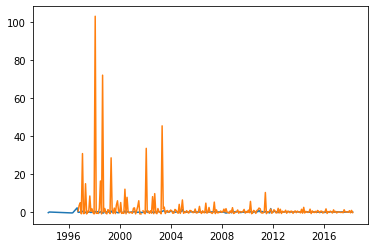

In [15]:
plt.plot(returns_monthly)
plt.show()

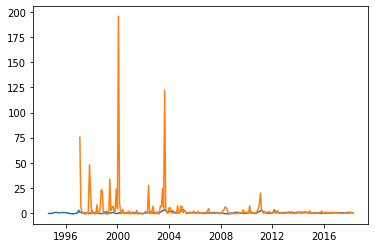

In [16]:
plt.plot(returns_daily)
plt.show()

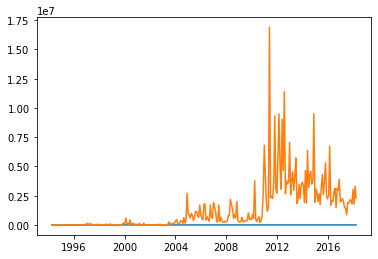

In [17]:
plt.plot(o_copy)
plt.show()

In [18]:
# daily covariance of stocks (for each monthly period)
covariances = {}
for i in returns_monthly.index:
    rtd_idx = returns_daily.index
    # mask daily returns for each month (and year) and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7654: RuntimeWarning: Degrees of freedom <= 0 for slice
  baseCov = np.cov(mat.T)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


            Adj_Close  Adj_Volume
Adj_Close         NaN         NaN
Adj_Volume        NaN         NaN


In [0]:
#plt.plot(covariance)

In [20]:
print(returns_daily.head())  

            Adj_Close  Adj_Volume
Datetime                         
1994-04-01        NaN         NaN
1994-05-02        NaN         NaN
1994-06-01        NaN         NaN
1994-07-01        NaN         NaN
1994-08-01        NaN         NaN


In [21]:
print(returns_daily.tail())  

            Adj_Close  Adj_Volume
Datetime                         
2017-12-01  -0.017629    1.040341
2018-01-01   0.206973    0.584132
2018-02-01   0.325240   -0.040874
2018-03-01   0.132010    0.536340
2018-04-02   0.114406    0.117880


In [0]:
#Generating portfolio weights
import numpy as np
for date in covariances.keys():
    cov = covariances[date]
    for single_portfolio in range(5000):
        weights = np.random.random(2)
        weights /= np.sum(weights)



In [0]:
r=returns_monthly.loc[date]

In [24]:
r.shape

(2,)

In [25]:
r

Adj_Close     0.021396
Adj_Volume   -0.306275
Name: 2018-04-02 00:00:00, dtype: float64

In [0]:
#Calculating returns and volatility

portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

# get portfolio performances at each month
for date in covariances.keys():
    cov = covariances[date]
    for single_portfolio in range(5000):
        weights = np.random.random(2)
        weights /= np.sum(weights)
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)



In [0]:
# weights.shape

In [28]:
print(volatility)

nan


In [0]:
# returns_monthly.shape

In [0]:
#weights.reshape(returns_monthly,2)

In [0]:
#weights.reshape(3,3)

In [0]:
# weights

In [0]:
# returns_monthly.head(n=2
#                      )

In [0]:
# r

In [0]:
# import numpy as np
# r.append(np.array[1])

In [0]:
# r1=r
# SD= np.empty(0,dtype=float)
# r1 = np.append(SD,0)

In [0]:
# r1

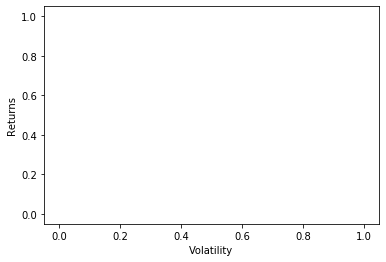

In [38]:
#Plotting the efficient frontier

date = sorted(covariances.keys())[-1]

# plot efficient frontier
plt.scatter(x=portfolio_volatility[date],
            y=portfolio_returns[date],
            alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()


In [0]:
#portfolio_returns.head()

In [40]:
#portfolio_volatility
print(portfolio_volatility[date])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [41]:
print(portfolio_weights[date][0])

[0.25459513 0.74540487]


In [42]:
print(portfolio_returns[date])

[-0.22285160749548427, -0.1109499309243734, -0.19477699754361388, -0.17025597090105318, -0.1541137934210112, -0.1866194527597908, -0.2489464572907924, -0.19083129964212336, -0.1627267495722885, -0.04910694760551683, -0.18351796764943196, -0.1536101212782253, -0.15566035641410272, -0.04909254315972973, -0.12084805445702942, -0.21140948200707294, -0.2134796685308038, -0.28547008892733683, -0.07614855962321715, -0.15501026725517422, -0.14195996293468874, -0.17546183549050096, -0.10859055277580733, -0.1183514281293501, -0.2920761260809299, -0.14142656586393512, 0.00239361434129581, -0.18060945946064572, -0.1053422098174982, -0.1324500461364476, -0.13724830689711237, -0.1303369287330129, -0.07885001697420908, 0.02023987284505678, -0.06778622340918312, -0.07250039956933921, -0.1122831574637465, -0.09914916090473522, -0.2618051710864196, -0.1312087006166075, -0.13704843138420766, -0.14485600543203608, -0.1518091403402016, -0.09421991717555005, -0.1837395977191214, 0.005246810961918426, -0.000

In [0]:
#Getting our Sharpe ratios

# empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}
# loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
        volatility = portfolio_volatility[date][i]
        sharpe_ratio.setdefault(date, []).append(ret / volatility)

    # get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])



In [44]:
print(sharpe_ratio[date])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [45]:
print(max_sharpe_idxs[date])

0


In [0]:
#Create features

# calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

# resample daily returns to first business day of the month
ewma_monthly = ewma_daily.resample('BMS').first()

# shift ewma 1 month forward
ewma_monthly = ewma_monthly.shift(1).dropna()

#Create features # calculate e prices are given a larger weight than older prices according to an exponential curve.


In [47]:
ewma_daily, ewma_monthly

(            Adj_Close  Adj_Volume
 Datetime                         
 1994-04-01        NaN         NaN
 1994-05-02        NaN         NaN
 1994-06-01        NaN         NaN
 1994-07-01        NaN         NaN
 1994-08-01        NaN         NaN
 ...               ...         ...
 2017-12-01   0.037332    0.094961
 2018-01-01   0.048277    0.126520
 2018-02-01   0.066145    0.115721
 2018-03-01   0.070395    0.142857
 2018-04-02   0.073234    0.141246
 
 [289 rows x 2 columns],             Adj_Close  Adj_Volume
 Datetime                         
 1994-12-01  -0.551771   -1.000000
 1995-01-02  -0.514545   -1.000000
 1995-02-01  -0.435394   -1.000000
 1995-03-01  -0.379561   -1.000000
 1995-04-03  -0.227435   -1.000000
 ...               ...         ...
 2017-12-01   0.041123    0.029762
 2018-01-01   0.037332    0.094961
 2018-02-01   0.048277    0.126520
 2018-03-01   0.066145    0.115721
 2018-04-02   0.070395    0.142857
 
 [281 rows x 2 columns])

In [0]:
best_idx=max_sharpe_idxs[date]

In [0]:
# #Calculate features and targets

# targets, features = [], []

# # create features from price history and targets as ideal portfolio
# for date, ewma in ewma_monthly.iterrows():
#     # get the index of the best sharpe ratio
#     #best_idx = max_sharpe_idxs[date]
#     #targets.append(portfolio_weights[date][best_idx])
#     features.append(ewma)

# targets = np.array(targets)
# features = np.array(features)

# #Calculate features and targets
# #targets, features = [], [] # create features
# #Then we loop through our monthly EWMA indices and values using pandas' iterrows() method.

In [50]:
print(portfolio_weights[date])

[array([0.25459513, 0.74540487]), array([0.59610192, 0.40389808]), array([0.34027454, 0.65972546]), array([0.41510896, 0.58489104]), array([0.46437241, 0.53562759]), array([0.36517012, 0.63482988]), array([0.17495764, 0.82504236]), array([0.3523162, 0.6476838]), array([0.43808699, 0.56191301]), array([0.78483723, 0.21516277]), array([0.37463537, 0.62536463]), array([0.46590954, 0.53409046]), array([0.45965254, 0.54034746]), array([0.78488119, 0.21511881]), array([0.56589436, 0.43410564]), array([0.28951474, 0.71048526]), array([0.28319685, 0.71680315]), array([0.0634931, 0.9365069]), array([0.70231037, 0.29768963]), array([0.46163651, 0.53836349]), array([0.50146404, 0.49853596]), array([0.39922146, 0.60077854]), array([0.60330238, 0.39669762]), array([0.57351368, 0.42648632]), array([0.04333249, 0.95666751]), array([0.50309189, 0.49690811]), array([0.94200907, 0.05799093]), array([0.3835117, 0.6164883]), array([0.61321582, 0.38678418]), array([0.53048685, 0.46951315]), array([0.515843

In [51]:
targets=[]
targets.append(portfolio_weights[date][best_idx])
targets

[array([0.25459513, 0.74540487])]

In [52]:
print(max_sharpe_idxs[date])

0


In [53]:
best_idx

0

In [54]:
# #Calculate features and targets# targets, features = [], []# # create features from price history and targets as ideal portfolio
# for date, ewma in ewma_monthly.iterrows():
#     # get the index of the best sharpe ratio
#     #best_idx = max_sharpe_idxs[date]
#     #targets.append(portfolio_weights[date][best_idx])
#     features.append(ewma)
# targets = np.array(targets)
# features = np.array(features)
# #Calculate features and targets# #targets, features = [], [] # create features# #Then we loop through our monthly EWMA indices and values using pandas' iterrows() method.
date

Timestamp('2018-04-02 00:00:00', freq='BMS')

In [0]:
t=[];f=[]
for datetime,ewma in ewma_monthly.iterrows():
  b=max_sharpe_idxs[date]
  t.append(portfolio_weights[date][b])
  f.append(ewma)

t=np.array(t)
f=np.array(f)

In [56]:
targets, print(t[-5:])

[[0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]]


([array([0.25459513, 0.74540487])], None)

In [0]:
#features = f

In [58]:
ewma

Adj_Close     0.070395
Adj_Volume    0.142857
Name: 2018-04-02 00:00:00, dtype: float64

In [59]:
datetime #= date then why error when using date and no on datetime?

Timestamp('2018-04-02 00:00:00', freq='BMS')

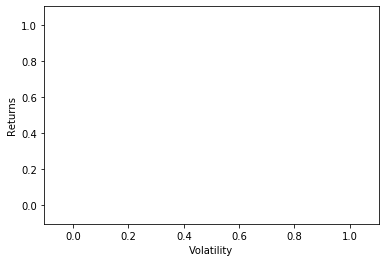

In [60]:
#Re-plot efficient frontier

# latest date
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

plt.scatter(x=cur_volatility,
            y=cur_returns,
            alpha=0.1,
            color='blue')

best_idx = max_sharpe_idxs[date]

plt.scatter(cur_volatility[best_idx],
            cur_returns[best_idx],
            marker='x',
            color='orange')

plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()



In [61]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
        # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

-0.22285160749548427


In [62]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

# Resample daily returns to first business day of the month with the first day for that month
ewma_monthly = ewma_daily.resample('BMS').first()

# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(1).dropna()

print(ewma_monthly.iloc[-1])

Adj_Close     0.070395
Adj_Volume    0.142857
Name: 2018-04-02 00:00:00, dtype: float64


In [0]:
# make train and test features




In [0]:
# train_size=[]
# train_features =[]
# train_targets = []
# test_features = []
# test_targets = []

In [64]:
train_size = int(0.8 * features.shape[0])
train_size

224

In [0]:
# train_size.shape

In [67]:
train_features = features[:train_size]
train_features = np.array(train_features)
train_features.dtype


dtype('float64')

In [68]:
train_targets = t[:train_size]
train_targets = np.array(train_targets)
train_targets.dtype


dtype('float64')

In [69]:
test_features = features[train_size:]
test_targets = t[train_size:]
test_targets = np.array(test_targets)
test_features=np.array(test_features)
test_targets.dtype,test_features.dtype

(dtype('float64'), dtype('float64'))

In [0]:
#train_features.dtype

In [71]:
print(features.shape),features.shape
#(230, 3)


(281, 2)


(None, (281, 2))

In [0]:
#test_features.reshape(60,2)

In [73]:
print(train_features.shape) 
print(train_targets.shape)
print(test_features.shape)
print(test_targets.shape)

(224, 2)
(224, 2)
(57, 2)
(57, 2)


In [74]:
from sklearn.ensemble import RandomForestRegressor

# fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.0
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [0]:
#stocks=['AMD']
# get predictions from model on train and test
test_predictions = rfr.predict(test_features)
# calculate and plot returns from our RF predictions and the QQQ returns
# test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions,axis=1)


In [76]:
#test_predictions.reshape(40,2)
print(test_predictions)

[[0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]
 [0.25459513 0.74540487]


In [0]:
# rm=returns_monthly
# rm.iloc
# rm=rm.iloc[train_size:].dot(test_predictions)
# t_r=np.sum(rm)

In [100]:
# a=np.ones( (40,2), dtype=np.int16 ); a=a@test_predictions
# # a.append(test_predictions);a
# # a = np.arange(80).reshape(40, 2)
# # a.append(test_predictions)
#t.head()
t[-1]

array([0.25459513, 0.74540487])

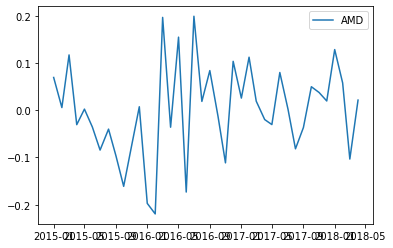

In [101]:
#plt.plot(test_returns, label='algo')
#plt.plot(t,label='algo') # just in place for real test_returns a dummy var t
plt.plot(returns_monthly['Adj_Close'].iloc[train_size:], label='AMD')
plt.legend()
plt.show()

In [81]:
returns_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 1994-06-01 to 2018-04-02
Data columns (total 2 columns):
Adj_Close     264 non-null float64
Adj_Volume    264 non-null float64
dtypes: float64(2)
memory usage: 16.2 KB


In [82]:
returns_monthly.describe()

,Adj_Close,Adj_Volume
count,264.000000,264.000000
mean,0.042146,inf
std,0.310207,NaN
min,-0.543121,-1.000000
25%,-0.097189,-0.428094
50%,0.010425,0.024664
75%,0.120310,0.976831
max,2.188679,inf


In [95]:
#Calculate hypothetical portfolio

cash = 1000
algo_cash = [cash]
#for r in test_returns:
for r in t:
    cash *= 1 + r
    algo_cash.append(cash)
# calculate performance for QQQ
cash = 1000  # reset cash amount
amd_cash = [cash]
#for r in returns_monthly['AMD'].iloc[train_size:]:
for r in returns_monthly['Adj_Close'].iloc[train_size:]:
    cash *= 1 + r
    amd_cash.append(cash)

print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('AMD returns:', (amd_cash[-1] - amd_cash[0]) / amd_cash[0])


algo returns: [4.78090821e+27 9.39350919e+67]
AMD returns: -0.2055472263868062


In [104]:
amd_cash

[1000,
 1069.2653673163418,
 1075.2623688155923,
 1201.049475262369,
 1164.3178410794603,
 1167.0164917541233,
 1125.3373313343332,
 1030.434782608696,
 989.2053973013495,
 893.5532233883059,
 749.625187406297,
 695.3523238380811,
 700.449775112444,
 562.368815592204,
 438.98050974512756,
 525.1874062968517,
 506.296851574213,
 584.5577211394304,
 483.35832083958036,
 579.4602698650675,
 590.2548725637182,
 639.7301349325339,
 631.3343328335834,
 561.0194902548727,
 619.0404797601201,
 634.9325337331336,
 706.1469265367318,
 719.6401799100452,
 705.3973013493254,
 683.9580209895054,
 738.5307346326838,
 739.8800599700152,
 679.4602698650676,
 654.5727136431785,
 687.1064467766118,
 712.8935532233885,
 726.8365817091455,
 820.089955022489,
 867.466266866567,
 777.811094452774,
 794.4527736131938]

In [0]:
#amd_cash1=amd_cash[np.sum()] trying another variable that will show a different plot than original but not being able to 
#wanted to do a 5% change from original so that the line will move 5% ahead of the 1st but i am unable to do so 
# due to my inability.... another thing was to introduce a moving avg line and function

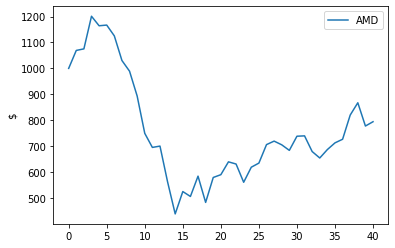

In [97]:
#plt.plot(algo_cash, label='algo')
plt.plot(amd_cash, label='AMD')
plt.ylabel('$')
plt.legend()  # show the legend
plt.show()